In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Reading Data

In [2]:
df_order=pd.read_excel('sales.xls',sheet_name='Orders',parse_dates=['Order Date'])
df_order.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
df_order.shape

(9994, 21)

In [4]:
df_return=pd.read_excel('sales.xls',sheet_name='Returns')
df_return

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


#### here merging odered data and return order data 

In [5]:
newdf = df_order.merge(df_return, on='Order ID',how='left')
newdf.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,NaN


#### Filling NaN value in returned column with No 

In [6]:
newdf=newdf.fillna('No')

#### Missing value treatment

In [7]:
newdf.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Returned         0
dtype: int64

#### Sort the date in ascending order

In [8]:
newdf=newdf.sort_values('Order Date')
newdf.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,No
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,No


In [9]:
df1=  newdf[(newdf['Returned']=='No') & (newdf['Category']=='Furniture')]
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,No
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,No
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,No
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,No
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,7637,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,No
7635,7636,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,No
1877,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764,No
5131,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,No


In [10]:
df = newdf[(newdf['Returned']=='No') & (newdf['Category']=='Furniture')]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,No
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,No
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,No
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,No
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,7637,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,No
7635,7636,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,No
1877,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764,No
5131,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,No


In [11]:
newdf.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Returned                 object
dtype: object

#### How many years data we have?

In [12]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Visualization -- Furniture sales data

**Sales and profit over the period of time**

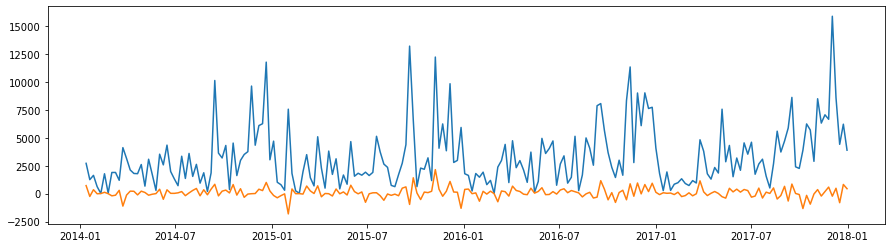

In [71]:
plt.figure(figsize=(15,4))
plt.plot(Sales['Sales'])
plt.plot(Sales['Profit'])

**Region wise sales**

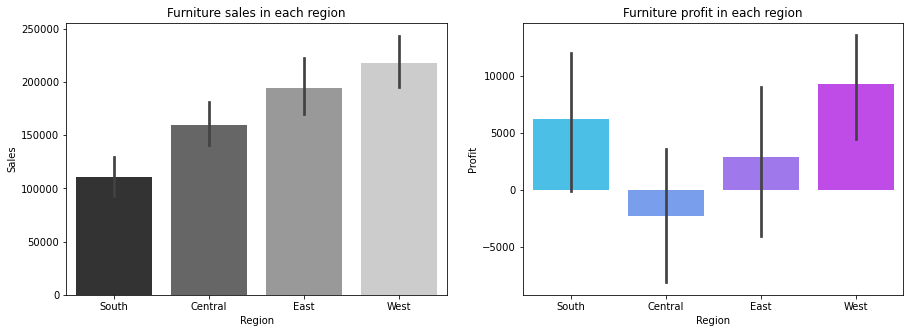

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sb.barplot(data=df1,x='Region',y='Sales',estimator=np.sum,palette='gist_gray')
plt.title('Furniture sales in each region')
plt.subplot(122)
sb.barplot(data=df1,x='Region',y='Profit',estimator=np.sum,palette='cool')
plt.title('Furniture profit in each region')
plt.savefig('region.png',format='png')

- From above sales and profit bar chart west region having maximum sales and profit 
- where as in south region having minimum sales and central region having maximum loss.

#### Region wise and segment wise sales

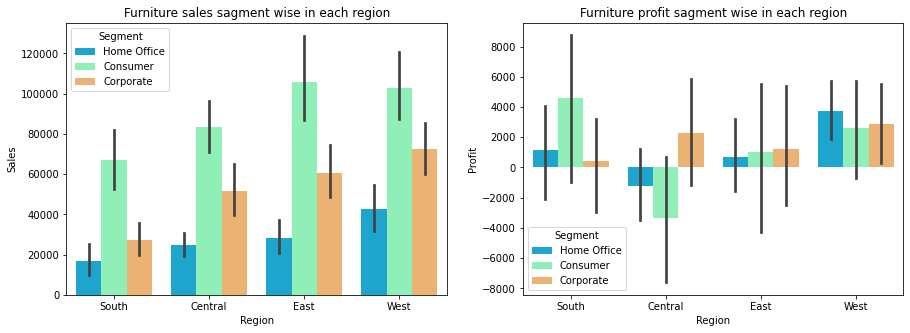

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sb.barplot(data=df1,x='Region',hue='Segment',y='Sales',estimator=np.sum,palette='rainbow')
plt.title('Furniture sales sagment wise in each region')
plt.subplot(122)
sb.barplot(data=df1,x='Region',hue='Segment',y='Profit',estimator=np.sum,palette='rainbow')
plt.title('Furniture profit sagment wise in each region')
plt.savefig('segment.png',format='png')

- In all four region Home Office has minimum sales but in west region home office is giving maximum profit.
- As we know that west region is giving ,maximum sales, but in west region customer segment is giving maximum sales
- In Central region customer segment is giving maximum loss in bussiness.

#### Sub-Category wise sales ans profit

Text(0.5, 1.0, 'Furniture profit sagment wise in each region')

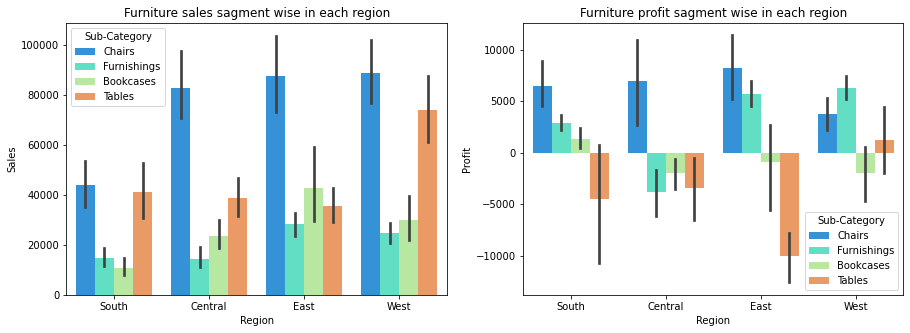

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sb.barplot(data=df1,x='Region',hue='Sub-Category',y='Sales',estimator=np.sum,palette='rainbow')
plt.title('Furniture sales sagment wise in each region')
plt.subplot(122)
sb.barplot(data=df1,x='Region',hue='Sub-Category',y='Profit',estimator=np.sum,palette='rainbow')
plt.title('Furniture profit sagment wise in each region')

## Model Building

In [17]:
df=pd.DataFrame(df.groupby('Order Date').Sales.sum())
df

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
...,...
2017-12-24,1393.494
2017-12-25,832.454
2017-12-28,472.404


#### Resampling the data in week wise

Text(0.5, 1.0, 'Sales over the years')

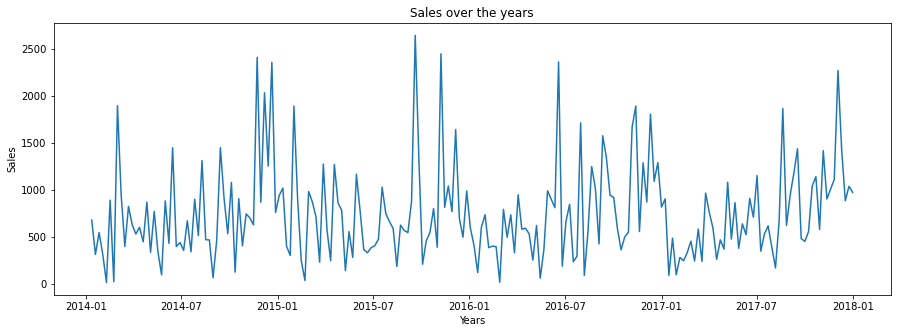

In [18]:
m_resample = df.resample('W') 
df=pd.DataFrame(m_resample.mean())
plt.figure(figsize=(15,5))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales over the years')

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(df,period=52)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

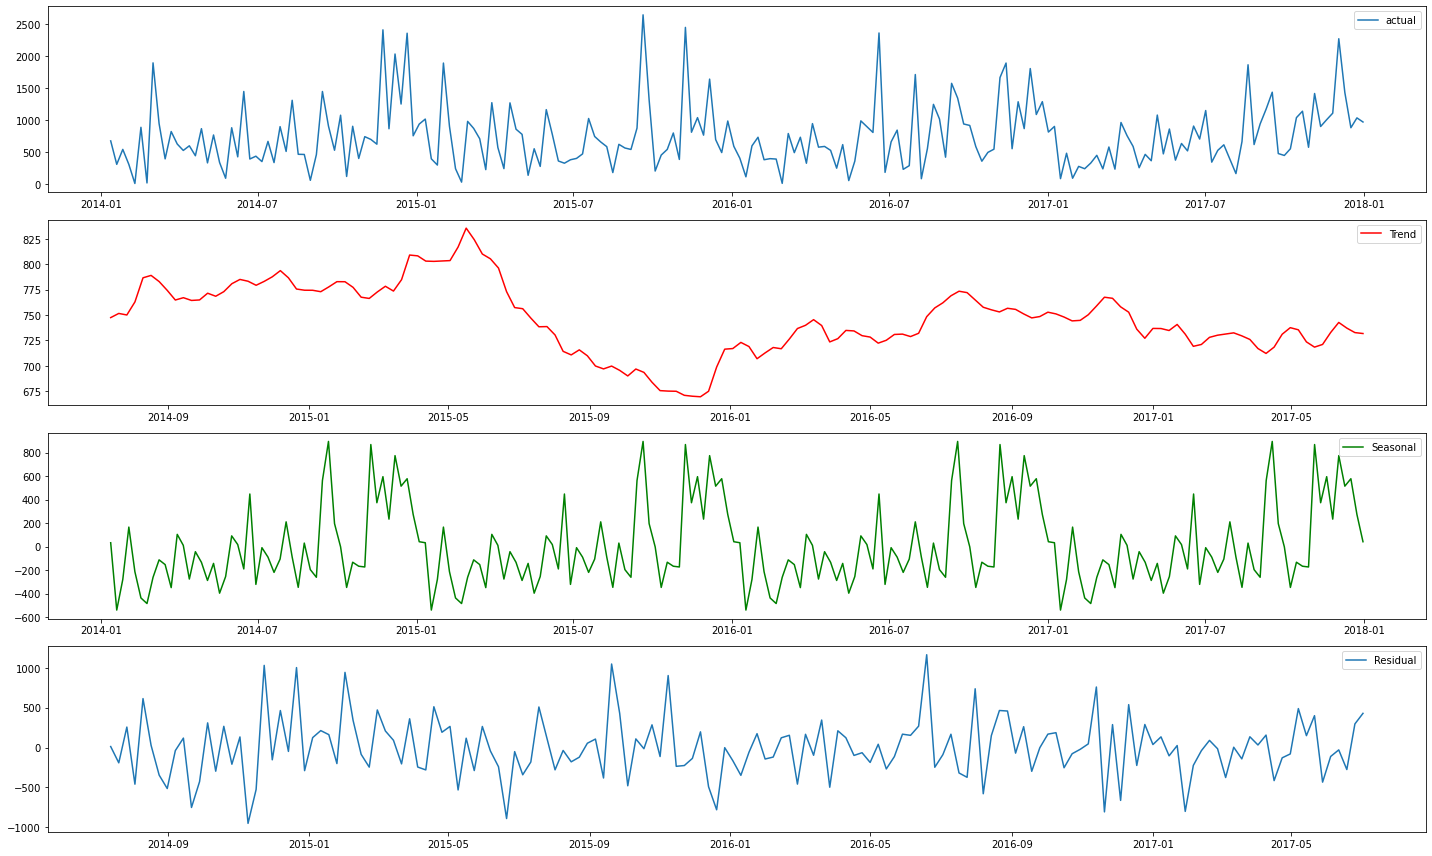

In [20]:
fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.subplot(411)
plt.plot(df,label='actual')
plt.legend()
plt.subplot(412)
plt.plot(trend,label='Trend',c='red')
plt.legend()
plt.subplot(413)
plt.plot(seasonal,label='Seasonal',c='g')
plt.legend()
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend()
plt.tight_layout()
plt.savefig('trend.png',format='png')

- 1st graph shows the actual data graph which is almost similar and uniform in terms of week.

- 2nd shows trend line of the data where we can see the upward trend towards end point over the years.

- 3rd graph shows the seasonality and here we can see there is seasonality i.e the data is same for every seasonal cycle.

- Last graph shows the Irregularity present in data

#### To check data is stationary or not

In [21]:
def checkstationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.5 :
        result = 'Data is stationary ,can build the model'
    else:
        result = 'Data is not stationary ,Make it stationary'
    return(result)

In [22]:
checkstationarity(df)

'Data is stationary ,can build the model'

#### So our data is stationary so differencing of data is not required

### ACF and PACF

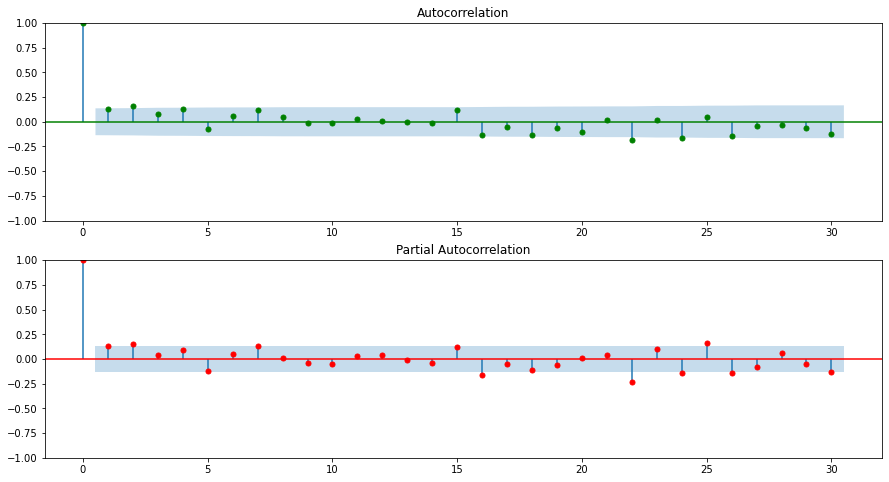

In [81]:
r=2;c=1
fig,ax=plt.subplots(r,c,figsize=(15,8))
plot_acf(df,lags=30,ax=ax[0],c='g')  
plot_pacf(df,lags=30,ax=ax[1],c='r') 
plt.show()

#### Here we get p as 5 and q as = 3

### Spliting of data

In [24]:
train_len=int(0.7*len(df)) 
train=df.iloc[:train_len]
test=df.iloc[train_len:]
print('70% of train data',train.shape)
print('70% of test data',test.shape)

70% of train data (145, 1)
70% of test data (63, 1)


In [82]:
combination=[]
for p in range(6):
    for q in range(4):
        combination.append((p,0,q))

In [83]:
combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3)]

## SARIMA model

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = []
for i in combination:
    m1=SARIMAX(train,order= i,seasonal_order=(i[0],i[1],i[2],30),initialization='approximate_diffuse').fit()
    model1.append(m1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [28]:
RMSE_ser=[]
for i in model1:
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    RMSE_ser.append(b)

In [29]:
min(RMSE_ser)

536.8021905215621

In [30]:
print('Minimum value of RMSE for serima value in list is at index : ',RMSE_ser.index(min(RMSE_ser)))

Minimum value of RMSE for serima value in list is at index :  14


In [31]:
print('Suitable value of p d and q :',combination[RMSE_ser.index(min(RMSE_ser))])

Suitable value of p d and q : (2, 0, 2)


#### Building model for best pand q value

In [60]:
model_serima=SARIMAX(train,order=(2,0,2),seasonal_order=(2,0,2,52),initialization='approximate_diffuse').fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
model_serima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 52)   Log Likelihood               -1331.835
Date:                            Mon, 14 Nov 2022   AIC                           2681.669
Time:                                    09:52:55   BIC                           2708.460
Sample:                                01-12-2014   HQIC                          2692.555
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3826      0.302      1.265      0.206      -0.210       0.975
ar.L2          0.5815      0.310      1.873      0.061      -0.027       1.190
ma.L1         -0.3795      0.442     -0.859      0.390      -1.245       0.486
ma.L2         -0.5861      0.399     -1.468      0.142      -1.368       0.196
ar.S.L52       0.4342      0.271      1.603      0.109      -0.097       0.965
ar.S.L104      0.5090      0.369      1.378      0.168      -0.215       1.233
ma.S.L52      -0.3115      0.361     -0.862      0.389      -1.020       0.397
ma.S.L104     -0.1249      0.550     -0.227      0.820      -1.203       0.953
sigma2      3.986e+06   2.33e-07   1.71e+13      0.000    3.99e+06    3.99e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               103.93
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             1.25
Prob(H) (two-sided):                  0.63   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.29e+29. Standard errors may be unstable.
"""

In [62]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model_serima.resid,lags=[10],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


In [63]:
sarima_forecast =pd.DataFrame(model_serima.forecast(len(test)))
sarima_forecast

,predicted_mean
2016-10-23,2968.260928
2016-10-30,3110.890717
2016-11-06,5476.180776
2016-11-13,4040.254266
2016-11-20,7351.544139
...,...
2017-12-03,7266.205496
2017-12-10,3758.007489
2017-12-17,4996.756070
2017-12-24,4327.914128


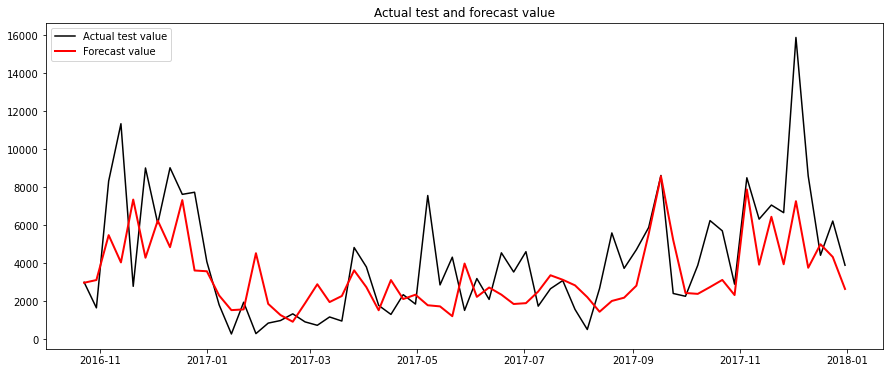

In [75]:
plt.figure(figsize=(15,6))
plt.plot(test,label='Actual test value',color='black')
plt.plot(sarima_forecast,label='Forecast value',linewidth=2,color='red')
plt.title('Actual test and forecast value')
plt.legend()

- Here actual and forecasted values for sarima model is not showing proper forecasted as compare to original data

## **---------------------------------------------------SARIMAX MODEL-------------------------------------------------------**

In [49]:
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078,No
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,No
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,No
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814,No
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,7637,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250,No
7635,7636,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842,No
1877,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764,No
5131,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144,No


In [50]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])
df1['Ship Date']=pd.to_datetime(df1['Ship Date'])

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 7474 to 906
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1950 non-null   int64         
 1   Order ID       1950 non-null   object        
 2   Order Date     1950 non-null   datetime64[ns]
 3   Ship Date      1950 non-null   datetime64[ns]
 4   Ship Mode      1950 non-null   object        
 5   Customer ID    1950 non-null   object        
 6   Customer Name  1950 non-null   object        
 7   Segment        1950 non-null   object        
 8   Country        1950 non-null   object        
 9   City           1950 non-null   object        
 10  State          1950 non-null   object        
 11  Postal Code    1950 non-null   int64         
 12  Region         1950 non-null   object        
 13  Product ID     1950 non-null   object        
 14  Category       1950 non-null   object        
 15  Sub-Category   1950

In [52]:
df1 = df1.set_index('Order Date')

In [53]:
Sales=df1.resample("W").sum()
Sales

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-12,16720,161814,2712.428,15,0.60,717.0750
2014-01-19,20830,247101,1250.473,24,1.55,-254.0044
2014-01-26,38216,376661,1636.658,24,0.20,349.8363
2014-02-02,7162,184728,623.666,5,0.35,-13.2304
2014-02-09,9267,89031,14.560,2,0.00,5.5328
...,...,...,...,...,...,...
2017-12-03,169526,1624200,15890.552,139,6.10,-229.0083
2017-12-10,121474,1107049,8594.504,110,3.40,479.7388
2017-12-17,88346,697821,4415.857,48,4.45,-813.9837


In [54]:
Sales1=Sales.drop(['Row ID','Postal Code'],axis=1)
Sales1

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-12,2712.428,15,0.60,717.0750
2014-01-19,1250.473,24,1.55,-254.0044
2014-01-26,1636.658,24,0.20,349.8363
2014-02-02,623.666,5,0.35,-13.2304
2014-02-09,14.560,2,0.00,5.5328
...,...,...,...,...
2017-12-03,15890.552,139,6.10,-229.0083
2017-12-10,8594.504,110,3.40,479.7388
2017-12-17,4415.857,48,4.45,-813.9837


In [55]:
lenth=int(len(Sales1)*0.7)
train1=Sales1.iloc[:lenth]
test1=Sales1.iloc[lenth:]
print(len(train1),len(test1))

145 63


In [56]:
train=Sales1['Sales'].iloc[:lenth]
test=Sales1['Sales'].iloc[lenth:]
len(train)

145

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
exog_train=train1[['Profit','Quantity','Discount']]
exog_test=test1[['Profit','Quantity','Discount']]

sarimax=SARIMAX(train,order=(2,0,2),seasonal_order=(2,0,2,52),exog=exog_train.values).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(sarimax.resid,lags=[52],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


In [59]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 52)   Log Likelihood               -1248.388
Date:                            Mon, 14 Nov 2022   AIC                           2520.777
Time:                                    09:51:53   BIC                           2556.498
Sample:                                01-12-2014   HQIC                          2535.292
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4979      0.227      2.196      0.028       0.053       0.942
x2            79.5510     12.378      6.427      0.000      55.291     103.811
x3           354.9698    246.509      1.440      0.150    -128.179     838.119
ar.L1          0.0366      0.136      0.268      0.789      -0.231       0.304
ar.L2         -0.9182      0.156     -5.884      0.000      -1.224      -0.612
ma.L1         -0.1379      0.133     -1.034      0.301      -0.399       0.123
ma.L2          0.9408      0.120      7.861      0.000       0.706       1.175
ar.S.L52       0.0053     22.751      0.000      1.000     -44.586      44.596
ar.S.L104      0.2767    248.080      0.001      0.999    -485.950     486.504
ma.S.L52      -0.0198     24.529     -0.001      0.999     -48.095      48.056
ma.S.L104      0.0019    269.040   7.11e-06      1.000    -527.306     527.310
sigma2       1.96e+06   5.73e+05      3.420      0.001    8.37e+05    3.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               718.78
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             2.30
Prob(H) (two-sided):                  0.99   Kurtosis:                        12.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.48e+14. Standard errors may be unstable.
"""

#### According to ljungbox test our model is Good

### Fiited value of train data

In [65]:
fitted_Sarimax_train=sarimax.fittedvalues
fitted_Sarimax_train

Order Date
2014-01-12    1763.257143
2014-01-19    2242.989852
2014-01-26    2214.368714
2014-02-02     684.775565
2014-02-09     134.767484
                 ...     
2016-09-18    7324.331630
2016-09-25    7306.640624
2016-10-02    3356.740303
2016-10-09    3303.859945
2016-10-16    3233.947213
Freq: W-SUN, Length: 145, dtype: float64

In [66]:
b=mean_squared_error(train,fitted_Sarimax_train,squared=False)
b

1320.6927725062565

### Forecasted value

In [67]:
sarimax_forecast_test =pd.DataFrame(sarimax.forecast(len(test1),exog=exog_test.values))
sarimax_forecast_test

,predicted_mean
2016-10-23,4114.534745
2016-10-30,3366.663013
2016-11-06,8716.772838
2016-11-13,8753.275954
2016-11-20,5124.646304
...,...
2017-12-03,13281.107260
2017-12-10,9903.890556
2017-12-17,4635.638330
2017-12-24,6808.149567


### Train data predict and actual 

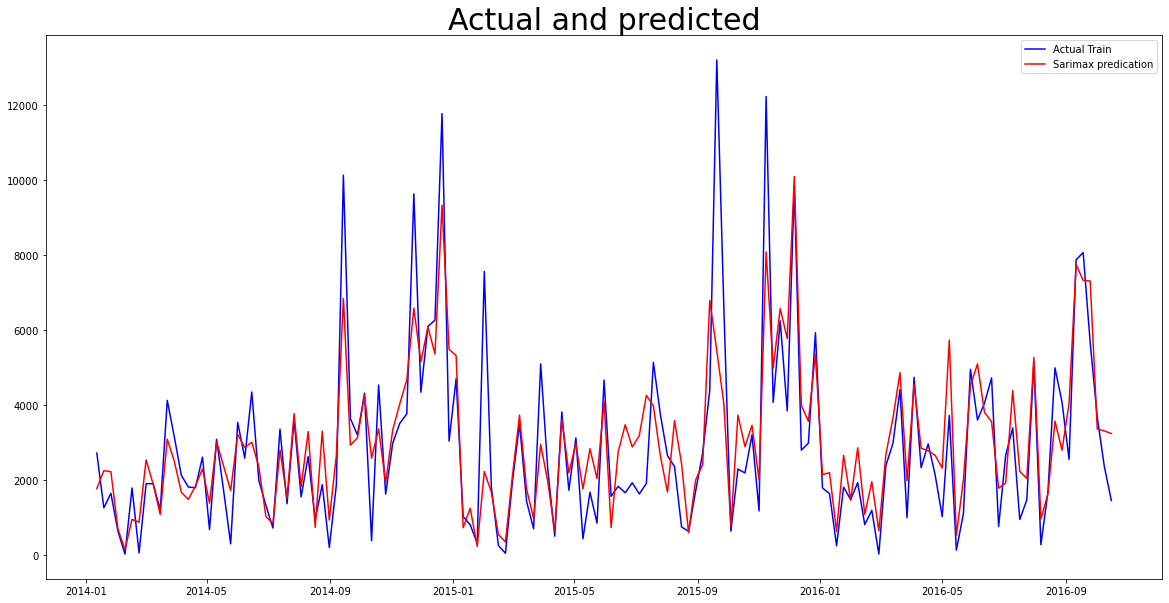

In [74]:
plt.figure(figsize=(20,10))
plt.plot(train,color='b',label= 'Actual Train')
plt.plot(fitted_Sarimax_train,color='r',label= 'Sarimax predication')
plt.title('Actual and predicted',size=30)
plt.legend()

- Here actual and predicted value for train data shows similar trend

### Forecast data

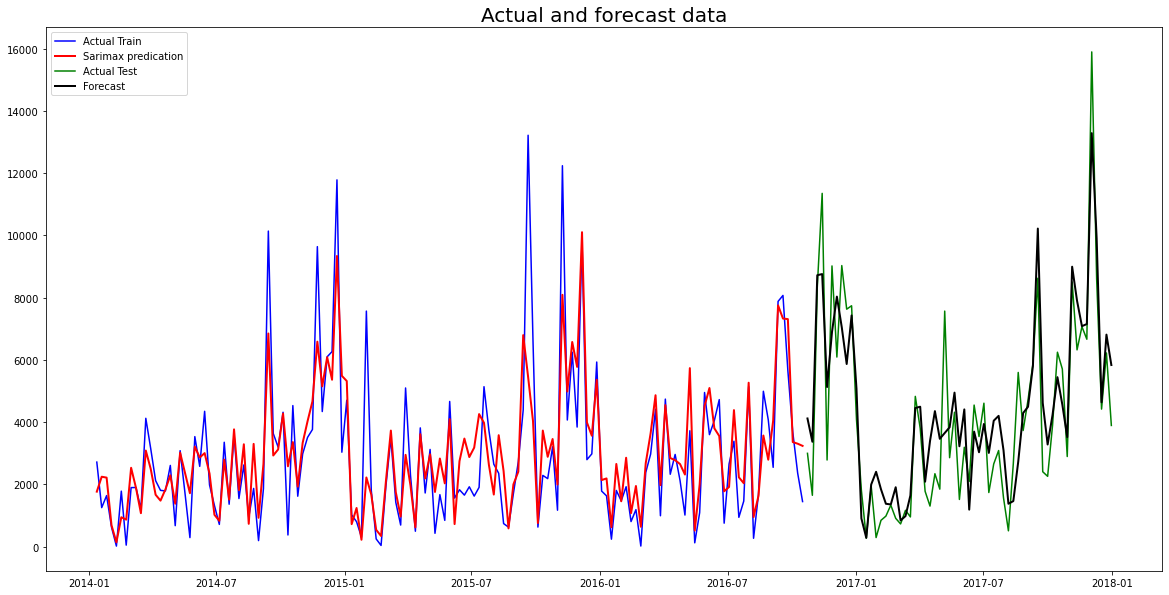

In [73]:
plt.figure(figsize=(20,10))
plt.plot(train,color='b',label= 'Actual Train')
plt.plot(fitted_Sarimax_train,color='r',label= 'Sarimax predication',linewidth=2)
plt.plot(test,color='g',label= 'Actual Test')
plt.plot(sarimax_forecast_test,'black',label='Forecast',linewidth=2)
plt.title('Actual and forecast data',size=20)
plt.legend()
# plt.savefig('forecast.png',format='png')


##### here actual and predicted value for train data is similar with respect to each other on the basic of this trained model forecasted value is calculated

#### Here black line is forecast data for firniture sales over the period of time

In [70]:
per={'Model_name':['SARIMA','SARIMAX'],
       'AIC':[2690,2520],
        'BIC':[2717,2556]}
Result=pd.DataFrame(per)
Result

,Model_name,AIC,BIC
0,SARIMA,2690,2717
1,SARIMAX,2520,2556
